In [23]:
using Plots
using PyCall

pyplot()

Plots.PyPlotBackend()

In [105]:

#support point
sx=[0.0
    0.3 
    0.3 
    0.3 
    0.0
    0.0]
sy=[0.2
    0.2
    0.2 
    0.2 
    0.2
    0.2]

px=zeros(Float64,5)
py=zeros(Float64,5)

#初期着地位置
px0=0.0
py0=0.0

x=zeros(Float64,2501)
y=zeros(Float64,2501)

x_dot=zeros(Float64,2501)
y_dot=zeros(Float64,2501)


#初期重心位置
x[1]=0.0
y[1]=0.01



dT=0.001
Tsup=0.8
#重力加速度
const g=9.8
#重心高さ
const zc=0.8
#歩行素片パラメータ用
x_un=zeros(Float64,5)
y_un=zeros(Float64,5)

x_dot_un=zeros(Float64,5)
y_dot_un=zeros(Float64,5)

#評価関数の重み係数
a=10
b=1

Tc=sqrt(zc/g)
C=cosh(Tsup/Tc)
S=sinh(Tsup/Tc)

8.191918354235918

In [106]:
#線形倒立振子の方程式
function pendulum_func(t::Float64,pxy::Float64,xyi::Float64,vi)
    zc=0.8
    g=9.8
    Tc=sqrt(zc/g)
    x_dot=((xyi-pxy)/Tc)*sinh(t/Tc)+vi*cosh(t/Tc)
    x=(xyi-pxy)*cosh(t/Tc)+Tc*vi*sinh(t/Tc)+pxy
    
    return x,x_dot
    
end




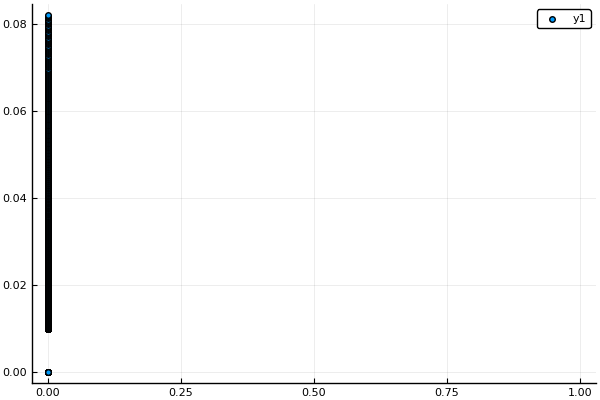

In [107]:
T=0.0 
n=0

#800まで
for t in T+dT*1000:dT*1000:Tsup*1000
    x[Int32(t)], x_dot[Int32(t)] =pendulum_func(T,Float64(px0),Float64(x[1]),0.0)
    y[Int32(t)], y_dot[Int32(t)] =pendulum_func(T,Float64(py0),Float64(y[1]),0.0)
    T=T+dT
end



plot(x,y,st=:scatter)

In [108]:
n=1

#次の着地点を計算する
px[n]=px0+sx[n]
py[n]=py0-(-1)^n*sy[n]


0.2

In [109]:
#次の歩行素片を計算する
#パラメータを決定する
#歩行素片の終端の状態でもある
x_un[n]=sx[n+1]/2
y_un[n]=(-1)^n*sy[n+1]/2

x_dot_un[n]=x_un[n]*(C+1)/(Tc*S)
y_dot_un[n]=y_un[n]*(C-1)/(Tc*S)

-0.30987307687079196

In [110]:
#最終状態の目標値
xd=px[n]+x_un[n]
yd=py[n]+y_un[n]

xd_dot=x_dot_un[n]
yd_dot=y_dot_un[n]

-0.30987307687079196

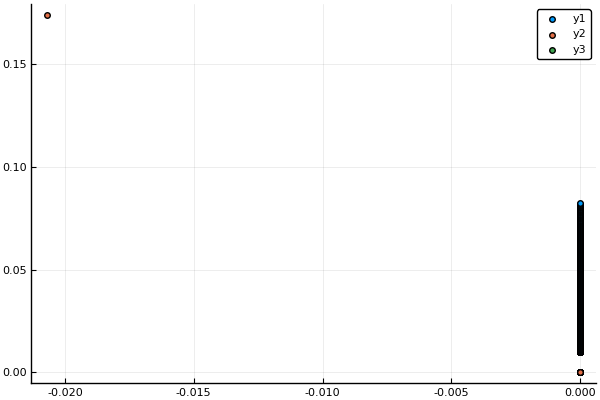

In [121]:
#着地位置を修正する px[n]を書き換える
D=a*(C-1)^2+b*(S/Tc)^2
px[n]=(-a*(C-1)/D) * (xd-C*x[800]-Tc*S*x_dot[800])-(b*S/(Tc*D))*(xd_dot-x[800]*S/Tc - C*x_dot[800]) #n歩目の終わりの状態を用いる
py[n]=(-a*(C-1)/D) * (yd-C*y[800]-Tc*S*y_dot[800])-(b*S/(Tc*D))*(yd_dot-y[800]*S/Tc - C*y_dot[800])


#ここまでで1サイクル
px[n],py[n]
plot(x,y,st=:scatter)
plot!(px,py,st=:scatter)

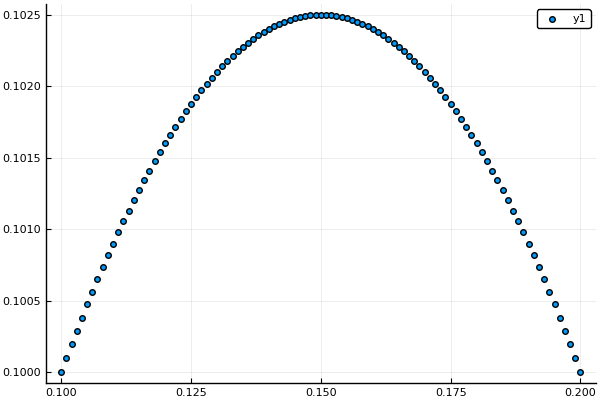

In [104]:
#両脚支持期間の計算

function para_a(xs,vs,ks,ve,ke,ts,te)
    S=[xs;vs;ks;ve;ke]
    B=[1 ts ts^2 ts^3 ts^4
        0 1 2ts 3ts^2 4ts^3
        0 0 2 6ts 12ts^2
        0 1 2te 3te^2 4te^3
        0 0 2 6te 12te^2]
    
    a=inv(B)*S
    
end

function dub(a,t)
    
end
t=[i for i in 0.1:0.001:0.2]
a=para_a(0.1,0.1,0.1,0.1,-0.1,0.1,0.2)

anss=zeros(Float32,101)

for i in 0.1:0.001:0.2
    anss[Int8(i*1000-99)]=a[2]+2a[3]*i^1+3a[4]*i^2+4a[5]*i^3　#速度
end 
plot(t,anss,st=:scatter)